In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from utils import *
import torch
import torchvision.transforms as transforms

In [5]:
img = np.array(Image.open("data/train/NIR/imgset0594/HR.png"))

(384, 384)


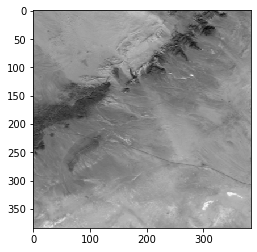

In [6]:
print(img.shape)
plt.imshow(img, cmap='gray')

In [7]:
from data import *  

In [8]:
oof = TrainREDDataset(upsample=True)
batch=oof[0]

../torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [9]:
print(batch['LR'].shape)
print(batch['HR'].shape)

torch.Size([9, 96, 96])
torch.Size([1, 96, 96])


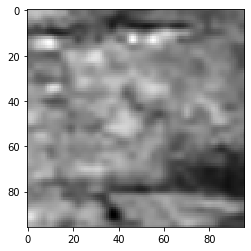

In [10]:
plt.imshow(batch['LR'][0], cmap='gray')

In [11]:
print(batch['LR'][0][0])

tensor([3610, 3618, 3623, 3624, 3624, 3623, 3619, 3615, 3618, 3622, 3604, 3550,
        3476, 3415, 3392, 3382, 3340, 3226, 3080, 2977, 2954, 2974, 2998, 3024,
        3053, 3055, 3001, 2919, 2865, 2864, 2891, 2918, 2940, 2962, 2971, 2966,
        2948, 2912, 2845, 2759, 2690, 2653, 2632, 2620, 2620, 2629, 2637, 2637,
        2634, 2637, 2646, 2661, 2689, 2733, 2791, 2850, 2920, 2994, 3040, 3040,
        3015, 2994, 2993, 2997, 2985, 2943, 2885, 2846, 2847, 2867, 2880, 2874,
        2860, 2847, 2836, 2826, 2816, 2811, 2809, 2803, 2786, 2767, 2763, 2785,
        2821, 2859, 2897, 2935, 2964, 2973, 2973, 2981, 3008, 3043, 3077, 3105],
       dtype=torch.int32)


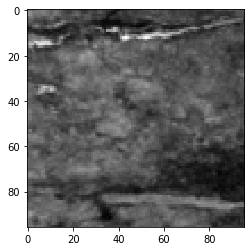

In [13]:
plt.imshow(batch['HR'].view(96, 96), cmap='gray')

In [40]:
oof2 = torch.utils.data.DataLoader(oof, batch_size=32, shuffle=False, num_workers=0)
oof3 = iter(oof2)

In [41]:
# print(next(iter(oof2)))
print(next(oof3)['LR'].shape)

torch.Size([32, 9, 96, 96])


In [45]:
def plot_images(predic_batch, hr_batch, num_imgs_shown=4):
    '''
    Input:
    - predic_batch: batch of low res images of size (-1, 1, W, H)
    - hr_batch: batch of high res images of size (-1, 1, W, H)
    - num_imgs_shown: number of images to plot in tensorboard

    Output:
        - fig: a matplotlib figure containing the image which will be written to
        tensorboard
    '''

    # TODO:

    fig, ax = plt.subplots(nrows=2, ncols=num_imgs_shown)

    for i in range(0, num_imgs_shown):
        img = predic_batch[i]
        img2 = hr_batch[i]
        ax[0, i].axis('off')
        ax[0, i].imshow(img.view(96, 96), cmap='gray')
        ax[1, i].axis('off')
        ax[1, i].imshow(img2.view(96, 96), cmap='gray')
    
    plt.show()

    return fig

In [46]:
print(next(oof3)['LR'].shape)
print(next(oof3)['HR'].shape)

torch.Size([32, 9, 96, 96])
torch.Size([32, 1, 96, 96])


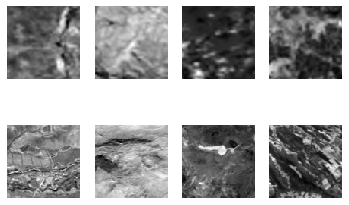

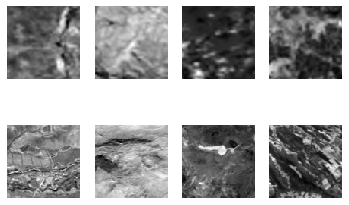

In [47]:
plot_images(next(oof3)['LR'][:, 0:1, :, :], next(oof3)['HR'][:, :, :])